In [42]:
#SIR.py
# Program to run simulation of SIR model for spread of influenza
#Assumption: Boys are vaccinated on day 1.0, every day, effective immediately

def SIR(DT = 0.25, simLength = 14):
    numIterations = int(simLength/DT) + 1
    t = 0 #time in days

    susceptibles = 762 #total number of boys at the school at are not sick
    infecteds = 1 #total number of boys at the school that are sick
    recovereds = 0 #total number of boys at the school that have recovered from the flu

    infection_rate = 0.00218 #rate at which the boys get sick based on encounters
    recovery_rate = 0.5 #rate at which the infected boys recover
    vac_percent = 0.15 #perctage of boys vaccinated per day

    get_sick = infection_rate * susceptibles * infecteds #number of susceptible boys that get sick
    recover = recovery_rate * infecteds #number of infected boys that recover
    vaccinated_boys = 0 #total number of vaccinated boys

    #print(t, "Susceptibles", "Infecteds", "Recovereds", "Vaccinateds")
    tLst = [t]
    SLst = [susceptibles]
    ILst = [infecteds]
    RLst = [recovereds]
    VLst = [vaccinated_boys]
    #print(t, susceptibles, infecteds, recovereds, vaccinated)
    for i in range(1, numIterations): #runs the for loop based on delta t
        t = i * DT #calculating time
        
        if t % 1 == 0: #checks if the time is a whole number, this code will run every day
            vaccinated_boys = susceptibles * vac_percent #calcualtes the number of boys who will be vaccinated that day
            susceptibles = susceptibles + (-get_sick) * DT - vaccinated_boys #calculates the numbers of susceptible boys, subtracting the number of boys who were vaccinated that day
            infecteds = infecteds + (get_sick - recover) * DT #calculated the number of boys who caught the flu that day
            recovereds = recovereds + recover * DT + vaccinated_boys #calculates the number of boys who recovered from the flu including the boys who received a flu shot today
            
        else:
            susceptibles = susceptibles + (-get_sick) * DT #calculates the number the number of susceptible boys every 6 hours
            infecteds = infecteds + (get_sick - recover) * DT #calculates the number of infected boys every 6 hours
            recovereds = recovereds + (recover) * DT #calculates the number of recovered boys every 6 hours

        get_sick = infection_rate * susceptibles * infecteds #recalculated the number of boys getting sick based of the new numbers
        recover = recovery_rate * infecteds #recalculates the number of boys recovering based on the new numbers

        #print(t, susceptibles, infecteds, recovereds, vaccinated)
        tLst.append(t)
        SLst.append(susceptibles)
        ILst.append(infecteds)
        RLst.append(recovereds)
        VLst.append(vaccinated_boys)

    #outfile = open("SIR.dat", 'w')
    #for i in range(numIterations):
        #outfile.write((tLst[i], SLst[i], ILst[i], RLst[i]))

    #outfile.close()
    return tLst, SLst, ILst, RLst, VLst


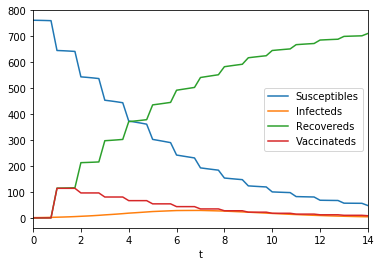

In [43]:
import pandas as pd
df = pd.DataFrame(SIR(), index = ['t', 'Susceptibles', 'Infecteds', 'Recovereds', 'Vaccinateds'])
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df = df.T
#df.head()
df.plot.line()

In [44]:
#Assumption: Boys are vaccinated at 12:00am of day 1.0, every day, effective every 3 days (12:00am on day 4.0)
def SIR_2(DT = 0.25, simLength = 14):
    numIterations = int(simLength/DT) + 1
    t = 0

    susceptibles = 762 #number of boys who have not been vaccinated
    infecteds = 1 #number of boys who have the flu
    recovereds = 0 #number of boys who have recovered from the flu

    infection_rate = 0.00218 #rate at which the boys get sick
    recovery_rate = 0.5 #rate at which the boys recover
    vac_percent = 0.15 #perctage of boys vaccinated per day

    get_sick = infection_rate * susceptibles * infecteds #calculates the number of boys who get sick
    recover = recovery_rate * infecteds #calculates the number of boys who recover
    vaccinated_today = 0 #boys who are vaccinated at 12:00am today
    vaccinated_yesterday = 0 #boys who were vaccinated yesterday
    vaccinated_twodaysago = 0 #boys who were vaccinated 2 days ago
    
    

    #print(t, "Susceptibles", "Infecteds", "Recovereds", "Vaccinateds")
    tLst = [t]
    SLst = [susceptibles]
    ILst = [infecteds]
    RLst = [recovereds]
    VLst = [vaccinated_today]
    #print(t, susceptibles, infecteds, recovereds, vaccinated_boys)
    for i in range(1, numIterations):
        t = i * DT #calculates time t in days
        
        if t % 1 == 0: #checks if t is a whole number, this code will run every day
            
            
            if t > 3: #if we are past the third day
                vaccinated_twodaysago = vaccinated_yesterday - (infection_rate*vaccinated_yesterday*infecteds) *DT
                #updates the number of boys vaccinated 2 days ago, subtracting the num of boys who get sick
                s1 = (infection_rate*vaccinated_yesterday*infecteds) 
                #num of boys who were vaccinated two days ago but got sick
                vaccinated_yesterday = vaccinated_today - (infection_rate*vaccinated_today*infecteds) * DT
                #updates the number of boys vaccinated yesterday, subtracting the num of boys who got sick
                s2 = (infection_rate*vaccinated_today*infecteds)
                #num of boy who were vaccinated yesterday but got sick
                vaccinated_today = susceptibles * vac_percent 
                #calculates num of boys who were vaccinated today
                susceptibles -= vaccinated_today
                #num of unvaccinated boys
                vaccinated_today -= (infection_rate * vaccinated_today * infecteds) * DT
                #updates num of boys who were vaccinated today, subtracting the num of boys who got sick
                susceptibles = susceptibles + (-get_sick) * DT #calculates the num of susceptible boys
                infecteds = infecteds + ((get_sick+ s1+s2+(infection_rate * vaccinated_today * infecteds)) - recover) * DT#calculates the num of infected boys adding the num who were vaccinated but still got sick
                recovereds = recovereds + recover * DT + vaccinated_twodaysago 
                #calculates the num of recovered boys adding the num of boys who were vaccinated two days ago and didn't get sick
                
            elif t >= 1: 
                vaccinated_twodaysago = vaccinated_yesterday - (infection_rate * vaccinated_yesterday*infecteds)*DT
                #updates the number of boys vaccinated 2 days ago, subtracting the num of boys who get sick 
                s1 = (infection_rate * vaccinated_yesterday*infecteds)
                #num of boys who were vaccinated two days ago but got sick
                vaccinated_yesterday = vaccinated_today - (infection_rate * vaccinated_today * infecteds) *DT
                #updates the number of boys vaccinated yesterday, subtracting the num of boys who got sick
                s=(infection_rate * vaccinated_today * infecteds)
                #num of boy who were vaccinated yesterday but got sick
                vaccinated_today = susceptibles * vac_percent
                #calculates num of boys who were vaccinated today
                susceptibles -= vaccinated_today #num of unvaccinated boys
                vaccinated_today -= (infection_rate * vaccinated_today * infecteds) *DT
                #updates num of boys who were vaccinated today, subtracting the num of boys who got sick
                susceptibles = susceptibles + (-get_sick) * DT #calculated the num of susceptible boys
                infecteds = infecteds + ((get_sick+s+s1+(infection_rate * vaccinated_today * infecteds)) - recover) * DT 
                #calculates the num of infected boys adding the num who were vaccinated but still got sick
                recovereds = recovereds + recover * DT #calculates the num of recovered boys
                
        else:
            vaccinated_today = vaccinated_today - (infection_rate * vaccinated_today * infecteds)*DT
            s1 = (infection_rate * vaccinated_today * infecteds)
            vaccinated_yesterday = vaccinated_yesterday - (infection_rate * vaccinated_yesterday * infecteds)*DT
            s2 = (infection_rate * vaccinated_yesterday * infecteds)
            vaccinated_twodaysago = vaccinated_twodaysago - (infection_rate * vaccinated_twodaysago * infecteds)*DT
            s3 = (infection_rate * vaccinated_twodaysago * infecteds)
            susceptibles = susceptibles + (-get_sick) * DT
            infecteds = infecteds + ((get_sick+s1+s2+s3) - recover) * DT 
            recovereds = recovereds + (recover) * DT
            
            

        get_sick = infection_rate * susceptibles * infecteds
        recover = recovery_rate * infecteds
        #print(t, vaccinated_today, vaccinated_yesterday, vaccinated_twodaysago, recovereds)

        #print(t, susceptibles, infecteds, recovereds, vaccinated_boys)
        tLst.append(t)
        SLst.append(susceptibles)
        ILst.append(infecteds)
        RLst.append(recovereds)
        VLst.append(vaccinated_today)

    #outfile = open("SIR.dat", 'w')
    #for i in range(numIterations):
        #outfile.write((tLst[i], SLst[i], ILst[i], RLst[i]))

    #outfile.close()
    #return tLst, SLst, ILst, RLst

    return tLst, SLst, ILst, RLst, VLst

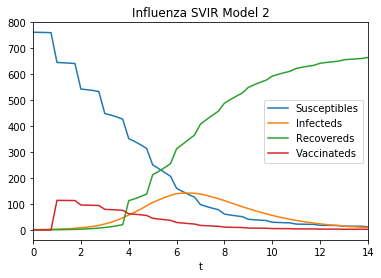

In [45]:
df2 = pd.DataFrame(SIR_2(), index = ['t', 'Susceptibles', 'Infecteds', 'Recovereds', 'Vaccinateds'])
new_header = df2.iloc[0] #grab the first row for the header
df2 = df2[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header
df2 = df2.T
#df2
df2.plot.line(title = "Influenza SVIR Model 2")

In [40]:
def SIR_3(DT = 0.25, simLength = 14):
    numIterations = int(simLength/DT) + 1
    t = 0

    susceptibles = 762
    infecteds = 1
    recovereds = 0

    infection_rate = 0.00218
    recovery_rate = 0.5

    get_sick = infection_rate * susceptibles * infecteds
    recover = recovery_rate * infecteds
    vaccinated_boys = 762 #all the boys are vaccinated before the model starts

    #print(t, "Susceptibles", "Infecteds", "Recovereds", "Vaccinateds")
    tLst = [t]
    SLst = [susceptibles]
    ILst = [infecteds]
    RLst = [recovereds]
    VLst = [vaccinated_boys]
    #print(t, susceptibles, infecteds, recovereds, vaccinated_boys)
    for i in range(1, numIterations):
        t = i * DT
        
        if t == 2: #checks if it is the second day
            susceptibles = susceptibles + (-get_sick) * DT - vaccinated_boys #calculates the number of susceptible boys subtracting the boys who were vaccinated and didn't get infected in the first two days
            infecteds = infecteds + (get_sick - recover) * DT #calculates the number of infected boys
            recovereds = recovereds + recover * DT + vaccinated_boys #calculates the number of recovered boys adding the boys who were vaccinated and didn't get infected
        elif t < 2:
            susceptibles = susceptibles + (-get_sick) * DT #calculates the number os susceptible boys
            infecteds = infecteds + (get_sick - recover) * DT #calculates the number of infected boys
            recovereds = recovereds + (recover) * DT #calculates the number of recovered boys
            vaccinated_boys = vaccinated_boys - (infection_rate * vaccinated_boys * infecteds) #calculates the number of vaccinated boys subtracting the number of boys who got sick before the vaccine became effective
        else:
            susceptibles = susceptibles + (-get_sick) * DT
            infecteds = infecteds + (get_sick - recover) * DT
            recovereds = recovereds + (recover) * DT

        get_sick = infection_rate * susceptibles * infecteds
        recover = recovery_rate * infecteds

        #print(t, susceptibles, infecteds, recovereds, vaccinated_boys)
        tLst.append(t)
        SLst.append(susceptibles)
        ILst.append(infecteds)
        RLst.append(recovereds)
        VLst.append(vaccinated_boys)

    #outfile = open("SIR.dat", 'w')
    #for i in range(numIterations):
        #outfile.write((tLst[i], SLst[i], ILst[i], RLst[i]))

    #outfile.close()
    return tLst, SLst, ILst, RLst, VLst



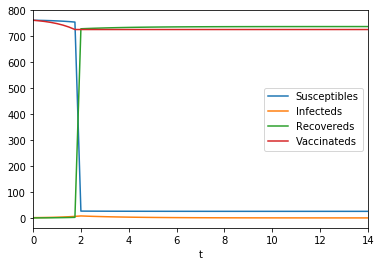

In [41]:
df3 = pd.DataFrame(SIR_3(), index = ['t', 'Susceptibles', 'Infecteds', 'Recovereds', 'Vaccinateds'])
new_header = df3.iloc[0] #grab the first row for the header
df3 = df3[1:] #take the data less the header row
df3.columns = new_header #set the header row as the df header
df3 = df3.T
#df3
df3.plot.line()